Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Shape after dropping missing values: (296, 14)


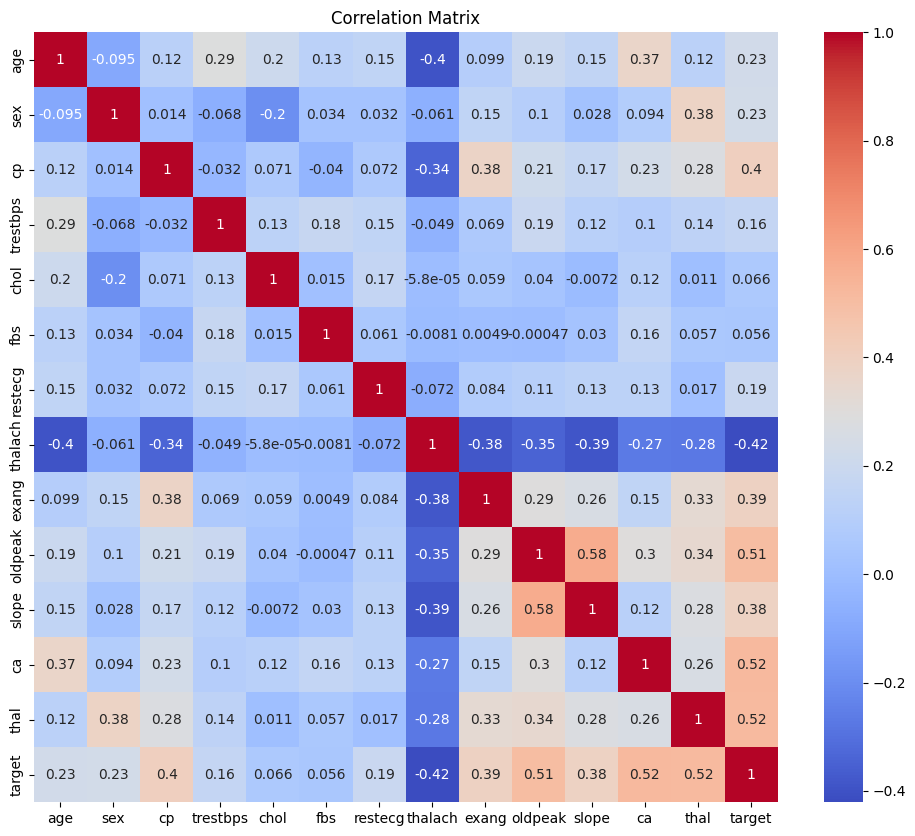


Model Accuracy Scores:
Logistic Regression: 66.67%
SVM: 60.00%
KNN: 61.67%
Decision Tree: 56.67%
Random Forest: 63.33%

Best Performing Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        36
           1       0.25      0.33      0.29         6
           2       0.00      0.00      0.00         6
           3       0.43      0.33      0.38         9
           4       0.00      0.00      0.00         3

    accuracy                           0.67        60
   macro avg       0.31      0.33      0.32        60
weighted avg       0.61      0.67      0.64        60



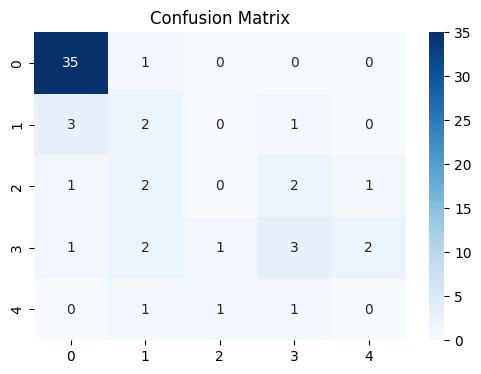

In [3]:
# Cardiovascular Disease Prediction (Fixed Version for Your Dataset)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv('heart.csv')

# Rename columns for better readability (optional but helpful)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric (force errors='coerce' to convert bad data into NaN)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Option 1: Drop rows with missing values
df.dropna(inplace=True)

# Double check
print(f"\nShape after dropping missing values: {df.shape}")

# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Dictionary to store model accuracies
results = {}

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results['Logistic Regression'] = accuracy_score(y_test, y_pred_lr)

# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
results['SVM'] = accuracy_score(y_test, y_pred_svm)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN'] = accuracy_score(y_test, y_pred_knn)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = accuracy_score(y_test, y_pred_rf)

# Display accuracy scores
print("\nModel Accuracy Scores:")
for model, acc in results.items():
    print(f"{model}: {acc*100:.2f}%")

# Find best model
best_model = max(results, key=results.get)
print(f"\nBest Performing Model: {best_model}")

# Classification report & confusion matrix for best model
if best_model == 'Random Forest':
    best_pred = y_pred_rf
elif best_model == 'Decision Tree':
    best_pred = y_pred_dt
elif best_model == 'KNN':
    best_pred = y_pred_knn
elif best_model == 'SVM':
    best_pred = y_pred_svm
else:
    best_pred = y_pred_lr

print("\nClassification Report:")
print(classification_report(y_test, best_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, best_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
